# Analizing data

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Data Source/aluguel_residencial_tratado.csv', sep=';')

In [ ]:
# Getting distinct values of Bairro
data.Bairro.unique()

In [ ]:
bairros = ['Rio Comprido', 'Andaraí', 'Santa Teresa', 'Inhaúma',
       'Marechal Hermes', 'Curicica', 'Santíssimo', 'Moneró', 'Camorim']

In [13]:
selecao = data['Bairro'].isin(bairros)
dados = data[selecao]

In [15]:
# Distinct values of Bairro
dados['Bairro'].drop_duplicates()

382       Rio Comprido
384            Andaraí
399       Santa Teresa
402            Inhaúma
409    Marechal Hermes
431           Curicica
440         Santíssimo
468             Moneró
549            Camorim
Name: Bairro, dtype: object

In [16]:
# Grouping per Bairro
grupo_bairro = dados.groupby('Bairro')

In [21]:
grupo_bairro.Valor.mean().round(2)

Bairro
Andaraí            1464.71
Camorim            1735.23
Curicica           1514.57
Inhaúma             821.43
Marechal Hermes     844.44
Moneró             1900.00
Rio Comprido       1610.24
Santa Teresa       2713.33
Santíssimo          756.25
Name: Valor, dtype: float64

# Discrite analisis

In [22]:
grupo_bairro.Valor.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Camorim,44.0,1735.23,1064.03,800.0,1175.0,1500.0,1700.0,6000.0
Curicica,76.0,1514.57,982.91,500.0,1100.0,1275.0,1500.0,7077.0
Inhaúma,7.0,821.43,160.36,550.0,750.0,800.0,950.0,1000.0
Marechal Hermes,9.0,844.44,246.78,600.0,700.0,800.0,850.0,1300.0
Moneró,9.0,1900.00,1006.23,1000.0,1200.0,1200.0,2500.0,3500.0
Rio Comprido,79.0,1610.24,745.55,700.0,1200.0,1500.0,1725.0,5000.0
Santa Teresa,114.0,2713.33,4206.26,500.0,1300.0,1700.0,2497.5,35000.0
Santíssimo,8.0,756.25,82.10,650.0,700.0,750.0,800.0,900.0


In [25]:
grupo_bairro.Valor.aggregate(['min', 'max','sum']).rename(columns={'min':'Mínimo','max':'Máximo','sum':'Soma'})

,Mínimo,Máximo,Soma
Bairro,,,
Andaraí,700.0,2950.0,142077.0
Camorim,800.0,6000.0,76350.0
Curicica,500.0,7077.0,115107.0
Inhaúma,550.0,1000.0,5750.0
Marechal Hermes,600.0,1300.0,7600.0
Moneró,1000.0,3500.0,17100.0
Rio Comprido,700.0,5000.0,127209.0
Santa Teresa,500.0,35000.0,309320.0
Santíssimo,650.0,900.0,6050.0


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Valor médio do aluguel por bairro')

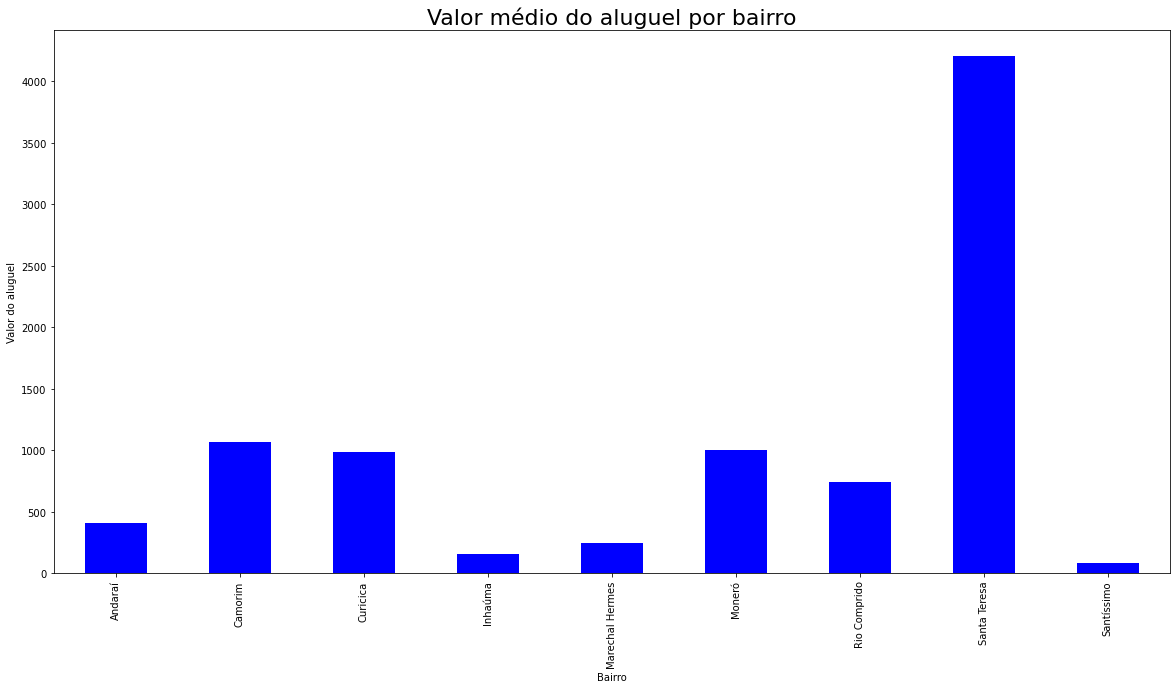

In [30]:
fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')
fig.set_ylabel('Valor do aluguel')
fig.set_title('Valor médio do aluguel por bairro', {'fontsize': 22})